In [ ]:
pip install s3fs

     |████████████████████████████████| 92kB 2.9MB/s 
     |████████████████████████████████| 51kB 2.9MB/s 
     |████████████████████████████████| 1.2MB 5.0MB/s 
     |████████████████████████████████| 6.5MB 8.9MB/s 
     |████████████████████████████████| 153kB 45.2MB/s 
     |████████████████████████████████| 266kB 41.9MB/s 
     |████████████████████████████████| 552kB 44.0MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3161 sha256=bade61c180f669bd3d02dccf1f951f0f3c3f8851b8169999c49ce788f3c32c73
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16


In [ ]:
import pandas as pd

s3_train_csv = 's3://zarr-depot/wells/FORCE: Machine Predicted Lithology/train.csv'
train = pd.read_csv(s3_train_csv, sep=';')

s3_test_csv = 's3://zarr-depot/wells/FORCE: Machine Predicted Lithology/test.csv'
test = pd.read_csv(s3_test_csv, sep=';')

In [ ]:
well = train[train['WELL'] == '34/3-1 A']
well.set_index('DEPTH_MD', inplace=True)
dataframe = train[train['WELL'] == '34/3-1 A']
#dataframe.set_index('DEPTH_MD', inplace=True)
dataframe=dataframe[100000:]

In [ ]:
pip install lasio

In [ ]:
train['WELL'].unique()

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16', '16/2-6', '16/4-1', '16/5-3', '16/7-4', '16/7-5',
       '16/8-1', '17/11-1', '25/11-15', '25/11-19 S', '25/11-5',
       '25/2-13 T4', '25/2-14', '25/2-7', '25/3-1', '25/4-5', '25/5-1',
       '25/5-4', '25/6-1', '25/6-2', '25/6-3', '25/7-2', '25/8-5 S',
       '25/8-7', '25/9-1', '26/4-1', '29/6-1', '30/3-3', '30/3-5 S',
       '30/6-5', '31/2-1', '31/2-19 S', '31/2-7', '31/2-8', '31/2-9',
       '31/3-1', '31/3-2', '31/3-3', '31/3-4', '31/4-10', '31/4-5',
       '31/5-4 S', '31/6-5', '31/6-8', '32/2-1', '33/5-2', '33/6-3 S',
       '33/9-1', '33/9-17', '34/10-19', '34/10-21', '34/10-33',
       '34/10-35', '34/11-1', '34/11-2 S', '34/12-1', '34/2-4',
       '34/3-1 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/7-13',
       '34/7-20', '34/7-21', '34/8-1', '34/8-3', '34/8-7 R', '35/11-1',
       '35/11-10', '35/11-11', '35/11-12

In [ ]:

       '29/6-1', '30/3-3', '30/3-5 S','34/12-1'
       '30/6-5', '31/2-1', '31/2-19 S', '31/2-7', '31/2-8', '31/2-9',
       '31/3-1', '31/3-2', '31/3-3', '31/3-4', '31/4-10', '31/4-5',
       '31/5-4 S', '31/6-5', '31/6-8', '32/2-1', 
       '35/11-1',
       '35/11-10', '35/11-11', '35/11-12', '35/11-13', '35/11-15 S',
       '35/11-6', '35/11-7', '35/12-1', '35/3-7 S', '35/4-1', '35/8-4',
       '35/8-6 S', '35/9-10 S', '35/9-2', '35/9-5', '35/9-6 S', '36/7-3',]

In [ ]:
import lasio
import numpy as np
dataframe = train[train['WELL'] == '36/7-3']
las = lasio.LASFile()
las.well.WELL='36/7-3'
cols=[ 'DEPTH_MD','CALI', 'RSHA',
       'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS',
       'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO','FORCE_2020_LITHOFACIES_LITHOLOGY','FORCE_2020_LITHOFACIES_CONFIDENCE']

for i in range(len(cols)):
  las.add_curve(cols[i],np.array(dataframe[cols[i]]))
las.write('Well3673.las', version=2)

In [ ]:
s3_test_csv = 's3://zarr-depot/wells/FORCE: Machine Predicted Lithology/test.csv'
test = pd.read_csv(s3_test_csv, sep=';')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test['WELL'].unique()

array(['15/9-14', '25/10-10', '25/11-24', '25/5-3', '29/3-1',
       '34/10-16 R', '34/3-3 A', '34/6-1 S', '35/6-2 S', '35/9-8'],
      dtype=object)

In [ ]:
import lasio
import numpy as np
dataframe = test[test['WELL'] == '15/9-14']
las = lasio.LASFile()
las.well.WELL='15/9-14'
cols=[ 'DEPTH_MD','CALI', 'RSHA',
       'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS',
       'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO']

for i in range(len(cols)):
  las.add_curve(cols[i],np.array(dataframe[cols[i]]))
las.write('Well_Validate_1_group_6.las', version=2)

In [ ]:
print(las.curves)

Mnemonic                           Unit  Value  Description  
--------                           ----  -----  -----------  
DEPTH_MD                           m                         
CALI                                                         
RSHA                                                         
RMED                                                         
RDEP                                                         
RHOB                                                         
GR                                                           
SGR                                                          
NPHI                                                         
PEF                                                          
DTC                                                          
SP                                                           
BS                                                           
ROP                                                          
DTS     

In [ ]:
well = lasio.read('Well1675.las')
well.keys()

['DEPTH_MD',
 'CALI',
 'RSHA',
 'RMED',
 'RDEP',
 'RHOB',
 'GR',
 'SGR',
 'NPHI',
 'PEF',
 'DTC',
 'SP',
 'BS',
 'ROP',
 'DTS',
 'DCAL',
 'DRHO',
 'MUDWEIGHT',
 'RMIC',
 'ROPA',
 'RXO',
 'FORCE_2020_LITHOFACIES_LITHOLOGY',
 'FORCE_2020_LITHOFACIES_CONFIDENCE']

In [ ]:
well['GR']

array([ 94.77666,  93.4189 ,  89.26358, ...,  63.85415,  63.05997,
       104.20347])

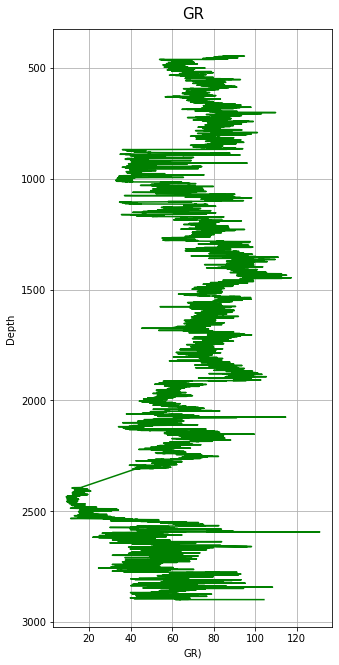

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,11)) # chart size

plt.plot(well['GR'], well['DEPTH_MD'], color='green') # plot the data
#plt.plot(well['FORCE_2020_LITHOFACIES_LITHOLOGY'], well['DEPTH_MD'], color='green') # plot the data
plt.title('GR', size=15, pad=10)
plt.xlabel("GR)"); plt.ylabel("Depth ") # labels
plt.grid(True) # give chart grids
plt.gca().invert_yaxis() # invert y-axis
plt.show()

In [ ]:
pip install welly

     |████████████████████████████████| 51kB 1.8MB/s 
     |████████████████████████████████| 81kB 3.5MB/s 
  Created wheel for welly: filename=welly-0.4.7-cp36-none-any.whl size=51555 sha256=5694e8a22ea6ebe4ccc43d253d057c4cdad42be1b67e9cfb44066d9656581771
  Stored in directory: /root/.cache/pip/wheels/1f/a6/e3/8543907612eab77a66ec2193df115c2580fd863bea3c092a44
  Created wheel for striplog: filename=striplog-0.8.5-cp36-none-any.whl size=80744 sha256=652d649dc28f67e30723cbbab3b272c540bf29fa2af40addcdb2542a87988413
  Stored in directory: /root/.cache/pip/wheels/a6/09/bd/87093a5be4a55cc7cacf9668e2dc0f3c905a1621b120af4820
Successfully built welly striplog


In [ ]:
Well.from_las('Well0.las')

NameError: ignored

In [ ]:
from welly import Well
import welly.quality as qc
tests = {
    'each': [qc.no_gaps, qc.no_monotonic]
}

well_df = Well.from_las('Well0.las')
results = well_df.qc_table_html(tests=tests)
HTML(results)

In [ ]:
import seaborn as sns
sns.displot(train, x="GR", hue="WELL",multiple="stack",legend=False,height=10,aspect=1)

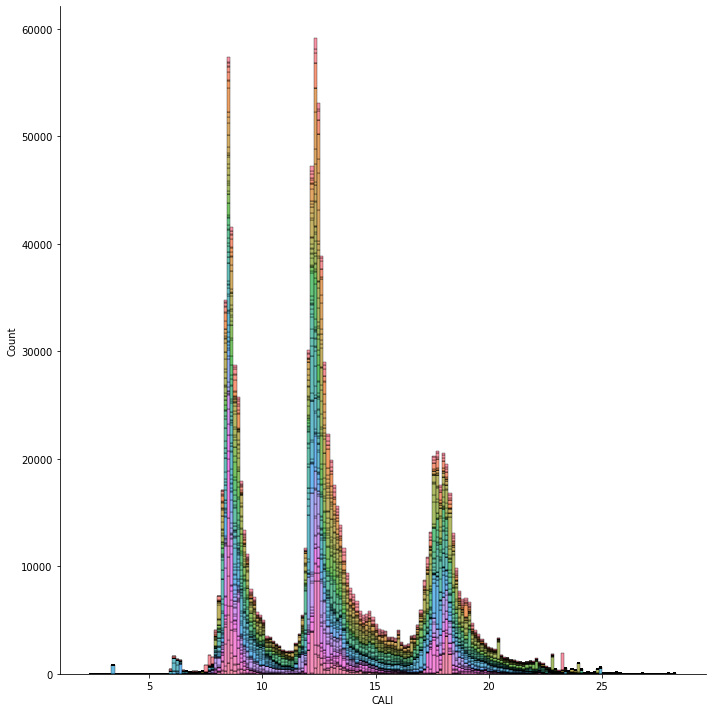

In [ ]:
import seaborn as sns
sns.displot(train, x="CALI", hue="WELL",multiple="stack",legend=False,height=10,aspect=1)

In [ ]:
import seaborn as sns
sns.displot(train, x="RSHA", hue="WELL",multiple="stack",legend=False,height=10,aspect=1)

In [ ]:
import seaborn as sns
sns.displot(train, x="RMED", hue="WELL",multiple="stack",legend=False,height=10,aspect=1)

In [ ]:
import matplotlib


In [ ]:
import seaborn as sns
sns.displot(train, x="SGR", hue="WELL",multiple="stack",legend=False,height=10,aspect=1)

NameError: ignored

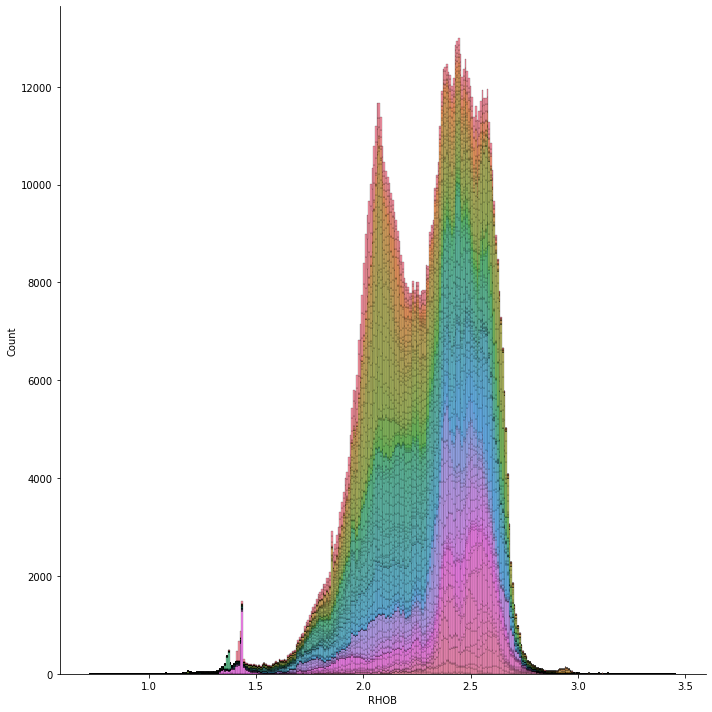

In [ ]:
import seaborn as sns
sns.displot(train, x="RHOB", hue="WELL",multiple="stack",legend=False,height=10,aspect=1)

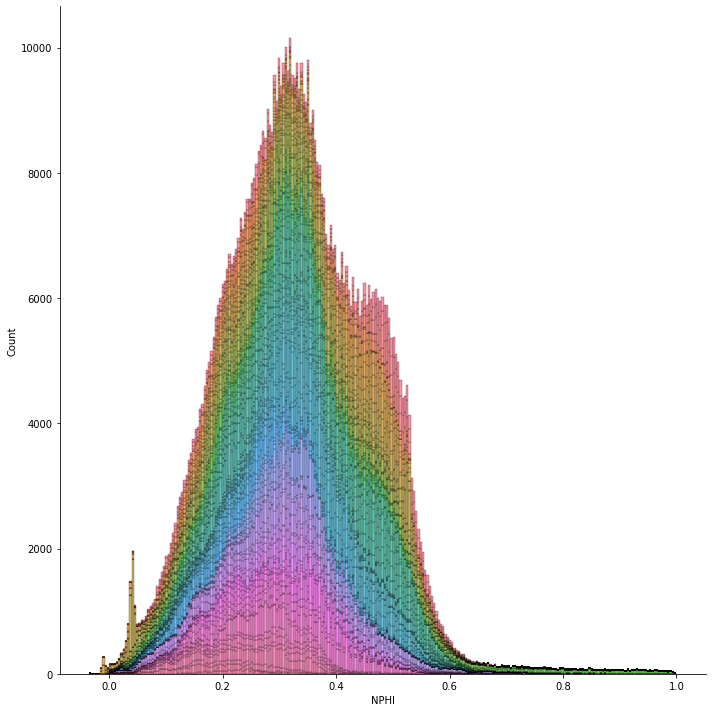

In [ ]:
import seaborn as sns
sns.displot(train, x="NPHI", hue="WELL",multiple="stack",legend=False,height=10,aspect=1)

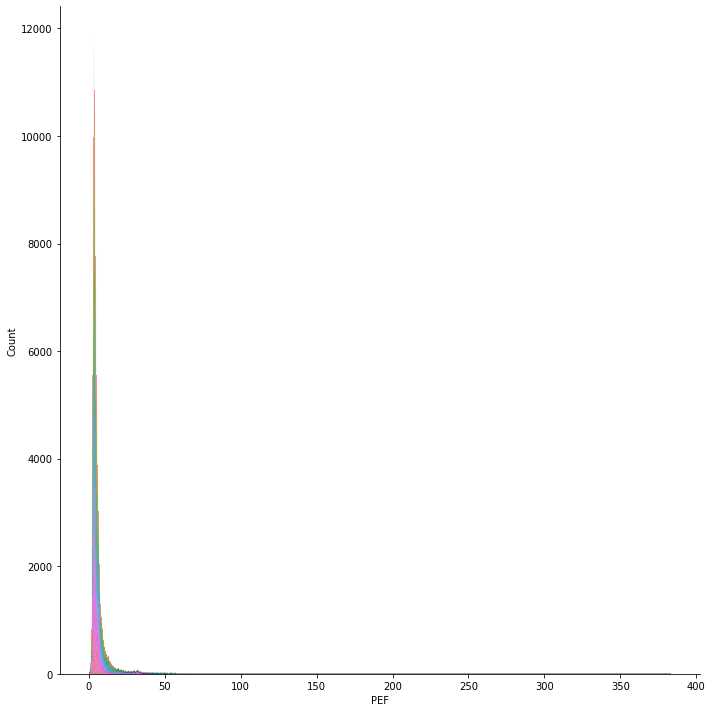

In [ ]:
import seaborn as sns
sns.displot(train, x="PEF", hue="WELL",multiple="stack",legend=False,height=10,aspect=1)

In [ ]:
import seaborn as sns
sns.displot(train, x="DTC", hue="WELL",multiple="stack",legend=False,height=10,aspect=1)

In [ ]:
import seaborn as sns
sns.displot(train, x="SP", hue="WELL",multiple="stack",legend=False,height=10,aspect=1)

In [ ]:
import seaborn as sns
sns.displot(train, x="BS", hue="WELL",multiple="stack",legend=False,height=10,aspect=1)

In [ ]:
import seaborn as sns
sns.displot(train, x="ROP", hue="WELL",multiple="stack",legend=False,height=10,aspect=1)

In [ ]:
import seaborn as sns
sns.displot(train, x="DTS", hue="WELL",multiple="stack",legend=False,height=10,aspect=1)

In [ ]:
import seaborn as sns
sns.displot(train, x="MUDWEIGHT", hue="WELL",multiple="stack",legend=False,height=10,aspect=1)